<img src="logo-2020.png" alt="frankfurt school hmi" style="width: 160px;"/>

___
# Machine Learning I.
## Problem Set 1: Linear Regression (14 points total)

### Instructions
The graded portion of problem set 1 consists of one notebook:
```
ps1_nb1-ml.ipynb
```
There is also a quick introduction to Jupyter notebooks and a non-graded tutorial of numpy arrays:
```
0-ten_minute_introduction_to_notebooks.ipynb
1-numpy_introduction.ipynb
```
Both are recommended. 

### Due Date
* Group D 19.02.2020 before 23:59:59 (CET)

### Instructor
* Prof. Dr. Gregory Wheeler ([gregorywheeler.org](http://gregorywheeler.org))

---

### Declare your collaborators
You may work alone or in a group. The maximum group size is 4 people. 

If you work in a group, use the next cell to enter the list of names (first, last) of your collaborators. 
~~~python
# Example
COLLABORATORS = ['Stu Dent', 'May Bee', 'Ki Val Storr']
~~~
You should also familiarize yourself with the collaboration policy on the course Canvas page.

In [55]:
# Be sure your names are strings
COLLABORATORS = []


---
## <i>Money cannot buy happiness. Or can it?</i>

The populations of some countries are happier than other countries. In this exercise, you will investigate the relationship between a country's per capita GDP and its "happiness score".  Since 2012, the annual [World Happiness Report](https://worldhappiness.report/), published by the United Nations' [Sustainable Development Solutions Network](https://www.unsdsn.org/), asks people around the world how happy they are. The happiness score uses the [Cantril scale](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx), which is a subjective scale constructed by asking respondents to imagine a ladder on which the best possible life for themselves receives the score of 10, the worst possible life a score of 0, and then are asked to rate their own lives on that scale between 0 and 10.  The questionaire is given to a representative sample of each country each year.

We expect more individual wealth to correlate with higher happiness. But, how much of the variation in happiness is explained by individual wealth?  That is the question we will explore.

There are three main tasks in this notebook.

 - PART A. Implement Gradient Descent to calculate the coefficients of a univariate linear regression
 - PART B. Use a built-in library to check your implementation in A and perform some analysis 
 - PART C. Prepare data yourself and apply your model. 
 
You will be asked to write some code and also answer several questions about the model and data. The first step is to run the next cell to load the basic libraries we will use in this assignment.

In [56]:
# import numpy and set up plotting parameters
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PART A - Gradient Descent

## I. Loading and Formatting Data
In the ps1 directory you will find the data set for problem 1, `ps1_data.csv`. File loading methods vary depending on the format of the data file. This particular data set is a _comma-seperated text file_ (.csv), so we will use the numpy function `np.loadtxt` and specify that the columns are delimited by commas.

Run the next cell to load `ps1_data.csv` into a numpy array assigned to the variable `data`.

In [57]:
data = np.loadtxt('ps1_data1.csv', delimiter=',')
data.shape


(154, 2)

In [58]:
print(data)

[[1.61646318 7.53700018]
 [1.48238301 7.52199984]
 [1.48063302 7.50400019]
 [1.56497955 7.49399996]
 [1.44357193 7.46899986]
 [1.50394464 7.37699986]
 [1.47920442 7.31599999]
 [1.40570605 7.31400013]
 [1.49438727 7.28399992]
 [1.48441493 7.28399992]
 [1.37538242 7.21299982]
 [1.10970628 7.079     ]
 [1.48709726 7.00600004]
 [1.54625928 6.99300003]
 [1.53570664 6.97700024]
 [1.48792338 6.95100021]
 [1.46378076 6.89099979]
 [1.7419436  6.86299992]
 [1.44163394 6.71400023]
 [1.25278461 6.65199995]
 [1.62634337 6.64799976]
 [1.10735321 6.63500023]
 [1.35268235 6.60900021]
 [1.18529546 6.59899998]
 [1.15318382 6.57800007]
 [1.69227767 6.57200003]
 [1.34327984 6.52699995]
 [1.2175597  6.454     ]
 [0.87200195 6.454     ]
 [1.23374844 6.45200014]
 [1.43092346 6.44199991]
 [1.12786877 6.42399979]
 [1.43362653 6.42199993]
 [1.38439786 6.40299988]
 [1.87076569 6.375     ]
 [1.07062232 6.35699987]
 [1.53062356 6.34399986]
 [1.3613559  6.16800022]
 [1.63295245 6.10500002]
 [1.32539356 6.09800005]


In [59]:
m = np.size(data,0)
m

154

Recall that numpy arrays are Python's standard datatype for computing with vectors, matrices, and tensors, and the numerical methods of numpy -- such as `np.dot` and `np.sum` -- are element-wise operations. Although there is also a Python matrix package designed specifically to do linear algebra operations, we will use numpy.

(For those of you new to Python but who are familiar with linear algebra or with programming matrix operations in MATLAB, [this page](https://www.khanacademy.org/math/precalculus/precalc-matrices/multiplying-matrices-by-matrices/v/matrix-multiplication-intro) contains useful comparison between Python and MATLAB to help you get quickly up to speed.)

You can confirm that data is a numpy array by checking its type, i.e. by excuting `type(data)`. It is also important to know about the dimensions of `data` -- that is, the number of rows (training examples) and the number of columns (features and target). This information is given by using the method `.shape`, i.e., by executing `data.shape`.

<div class="alert alert-block alert-info">
<b>Tip:</b> You can insert a cell anywhere (+) and delete it (scissors) or any other cell that is not locked
    
<img src="ps_fig1.png" alt="ps3_fig1" style="width: 100px;"/>  

However, before turning in your assignment, you should remove any cells you have added.  
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> To clear the output of your notebook and your local memory, you can restart the kernel and clear  “Kernel >> Restart and Clear all Output":

<img src="ps_fig2.png" alt="ps3_fig2" style="width: 250px;"/> 
</div>

You should see that `data` has two columns. The first column is the feature $x$, <b>per Capita GDP</b> of each country in `data`, and the second column is the target $y$, the corresponding <b>Happiness index</b>. The number of rows denotes the number of training examples, which by convention is assigned to the variable `m`.

In the next cell, you should complete the function `set_variables()` which will take an array as an argument and return three variables: `x` and `y` , each of which is itself an array; and `m`, an integer. When `set_variables()` is called specifically on `data`, the three variables are

    x - the features of psl_data; i.e., the first column, which are city populations
    y - the target variable of psl_data; i.e., the second column, which are revenues
    m - the number of training examples in psl_data.

<u>Your code should work on <b>any</b> two-column array</u>, not only on `data`.

<div class="alert alert-info"><b>Tip</b>: Remember that arrays in Python are 0-indexed.</div>



### Completing Functions

The next cell has a partially completed function, `set_variables()`.  Inside the code block, you will see two lines:

~~~python

# YOUR CODE HERE
raise NotImplementedError()
~~~

To complete the function, you should delete both of these lines and replace the comment `# YOUR CODE HERE` with your line or lines of code.  The second line raises a  "not implemented error" and is included automatically to guard against accidentally submitting an incomplete assignment.  To pass the final validation, you must remove each of these errors from your functions.



In [60]:
def setVariables(data_array) :
    """
    The function set_variables() is called on one argument:
    
        data_array - an np.array 
        
    and returns three global variables:
        x - the first column of data_array
        y - the second column of the data_array
        m - the number of rows of the data_array na
    Your code should run on any two-column data_array.
    """
    global x
    global y
    global m
    # YOUR CODE HERE
    x = data_array[:,0]
    y = data_array[:,1]
    m = np.size(data_array,0)
    #raise NotImplementedError()
    return x, y, m


### Test Cells
The next three cells are test cells that will evaluate your implementation of `setVariables()`. You should run all three. (They will be run automatically when your notebook is graded.) Each of these cells has a line of code, which is a "public" test of your code, but there are also "hidden" tests of your code.  The public tests are designed to give you some initial feedback that you are on the right track.  

In [61]:
"""TEST CELL 1 for set_variables"""
setVariables(data)
assert x[34] == 1.870765686 

In [62]:
"""TEST CELL 2 for set_variables"""
setVariables(data)
assert y[71] == 5.429999828

In [63]:
"""TEST CELL 3 for m of set_variables"""
setVariables(data)
assert m < 200

## II. Data Visualization 
The following block of code produces a basic scatterplot with a legend and title.

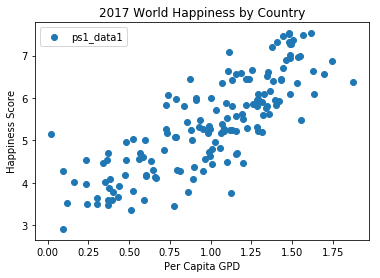

In [64]:
# produce scatterplot

plt.scatter(x,y, label="ps1_data1")
plt.title('2017 World Happiness by Country')
plt.xlabel(r'Per Capita GPD')
plt.ylabel(r'Happiness Score')
plt.legend()

## III. Implementing Gradient Descent


Now we will implement gradient descent to fit the **linear regression** parameters $\begin{align} \theta & = (\theta_0,\theta_1)\end{align}$ to the data set, `data`.

### Univariate Linear Regression

A univariate linear regression has one _independent variable or regressor, x,_ which is called a _feature_ in machine learning. The _dependent variable_ or _target_ variable $y$, is the  true happiness score.  The goal is to fit a linear model to estimate or predict the value of $y$, happiness, as some linear function of $x$, per capita GDP. Specifically, the hypothesis $\begin{align} h(x; \theta) \end{align}$ is determined by $\begin{align} \boldsymbol{\theta} \end{align}$, a two-dimensionpal vector $\theta = (\theta_0,\theta_1)$, and the single feature $ x_1$, such that $$h(x; \theta) = \theta_0 + \theta_1x_1.$$


To fit a model of this form to data, we need a way to pick values for $\theta_0$ and $ \theta_1$ that "best fit" the data. Intuitively, we want to select parameters that minimize the error of its estimates of the known values for $y$ in the training data. Specifying, we will use <b>residual squared error (RSS)</b> as the numeric measure of performance and <b>ordinary least squares</b> as the definition of "best fit."  Defining the precise form of this minimization task is done by defining the optimization objective of the algorithm, which is the next step.

### Optimization Objective

The optimization objective of linear regression is to minimize the <b>residual sum of squares</b>, RSS,  

$$RSS = \sum_{i=1}^m (\hat{\epsilon}^{(i)})^2 = \sum_{i=1}^{m} (y^{(i)} - (\hat{\theta}_0 + \hat{\theta}_1x^{(i)} ))^2$$

where RSS is the standard <b>loss function</b> used for fitting linear regression models.  The <b>mean squared error</b> (MSE) is $\frac{RSS}{m}$.  The cost function $J(\boldsymbol{\theta})$ we will minimize is

$$J(\boldsymbol{\theta}) = \frac{1}{2m}\sum_{i=1}^m (h(x^{(i)}; \boldsymbol{\theta}) - y^{(i)})^2$$

which is $\frac{1}{2} * MSE$. 

The index $i$ ranges over the number of training examples, $m$, in `data`. Informally, the cost function $J$ applied to $\begin{align} \boldsymbol{\theta} & = (\hat{\theta}_0,\hat{\theta}_1)\end{align}$ assesses the "cost" of using particular values for $\hat{\theta}_0$ and $\hat{\theta}_1$ to fit a line to `data`, measured as squared-error loss, and the optimization problem is one of picking values for $\hat{\theta}_0$ and for $\hat{\theta}_1$ that makes those costs as close to zero as possible. Unpacking the right side of this equation further, for each training example $i$ (that is, for each $i$ of the $m$ rows of `data` ), a hypothesis $h$ parameterized by $\boldsymbol{\theta}$ looks at the feature $x$ of the $i$th training example, written $x^{(i)}$, and computes an estimate of the value of $y$ for this $i$th example, written $h(x^{(i)}; \boldsymbol{\theta})$. The total loss then is the average squared-error loss for all $m$ training examples.

Specifically, the optimization objective is to minimize the cost function $J(\boldsymbol\theta)$, written as $\min_{\boldsymbol{\theta}} J(\boldsymbol\theta)$. The fraction $\frac{1}{2}$ and changing $(y - h)^2$ in RSS to $(h- y)^2$ are each mathematical conveniences that make the next step simplier and more intuitive, respectively. 

<div class="alert alert-info"><b>Notation 1</b>: Recall that in frequentist statistics $\theta$ is a true but unknown parameter and $\hat{\theta}$ is an estimate of that unknown parameter. In short, the <b>estimators</b> that we construct, manipulate, and evaluate all wear hats. But, since we never deal directly with "true but unknown" parameters, when the discussion turns to coding we drop the hat notation. </div>


### Implementation

The adjustable parameters of a univariate regression model $h(x^{(i)}; \boldsymbol{\theta})$  are $\theta_0$ and $\theta_1$ -- or, if you did not read the previous remark about notation, $\hat{\theta}_0$ and $\hat{\theta}_1$. The parameters $\theta_0$ and $\theta_1$  determine the $y$-intercept and slope, respectively.  They are the values that gradient descent changes to minimize the cost $J(\boldsymbol{\theta})$.

There are a family of gradient descent algorithms. We will implement **batch gradient descent**. In batch gradient descent, at each iteration of the algorithm the values for the parameter vector $\boldsymbol{\theta}$ (should!) change  closer to the optimal values that realize the lowest cost $ J(\boldsymbol\theta)$.  

<div class="alert alert-info"><b>Notation 2</b>:  The actual optimal parameter values that minimizes $J$ are unknown.  Were our discussion to dwell on the difference between the actual parameters and our estimated parameters, then we'd be compelled to put hats on the estimated parameters. </div>


As we discussed in class, at each step batch gradient descent **simultaneously updates** all parameters $\begin{align} \theta_j \end{align}$: <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\begin{align}\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h(x^{(i)}; \boldsymbol{\theta}) - y^{(i)})x^{(i)} \end{align}$ simultaneous update of $\begin{align} \theta_j \end{align}$ for all _j_.

The next series of steps guides you through an implementation of gradient descent.

___

**Step 1**. Observe that there are two parameters, $\theta_0$ and $\theta_1$, but only one feature in `data`. (Check the shape of `x` if you are unconvinced.) Since $\theta_0$ is the y-intercept term, this is the same as if we multiplied $\theta_0$ by 1, for each <i>m</i> entries. We say that $x_0$ = 1 is a **intercept term**, and we add intercept terms in such cases to ensure that feature vectors and parameter vectors are <b>comformable</b>.

With this explanation in mind, add a column of 1's to the single column feature vector within data. We do this first by initializing an $(m, 2)$ array of 1's, then replacing the second column of <i>X</i> with the first column of `data`. This new row of ones is to accommodate the $y$-intercept parameter, $\theta_0$. The next step is to
initialize a $(1, 2)$ array of zeros, called `theta` , which initializes the values for $\theta_0$ and $\theta_1$, respectively. Our gradient descent algorithm will update `theta` in order to minimize the cost function <i>J</i>.

Running the next cell initializes the variables `x` and `theta` for you.

In [65]:
# initialize data array
X = np.ones((m, 2))
X[:,1] = data[:,0]
# initalize model
theta = np.zeros(2)

---
## Question 1

Suppose that in addition to "<i>per capita GDP</i>" you also had the average "<i>life expectancy</i>" for each country to use as features in a linear model to estimate each country's <i>happiness score</i>. 

Which of the following statements are true? Select all and only that apply.

* A) $h(\boldsymbol{x}; \boldsymbol{\theta}) = \theta_0 + \theta_1x_1 + \theta_2x_2$
* B) $h(\boldsymbol{x}; \boldsymbol{\theta}) = \theta_0 + \theta_1x_1 + x_2$
* C) $h(\boldsymbol{x}; \boldsymbol{\theta}) = \theta_0 + \theta_1x_1 x_2$

Suppose now you wish to initialize a data array and parameter vector for this model.  Which block of code could you use for this model?  (Assume as above that the last column of `data` is the target, $y$.)

* D) 
~~~python
# initialize data array
X = np.ones((m, 3))
X[:,1] = data[:,0]
# initalize model
theta = np.zeros(2)
~~~

* E) 
~~~python
# initialize data array
X = np.ones((m, 3))
X[:,0] = data[:,0]
X[:,1] = data[:,1]
# initalize model
theta = np.zeros(3)
~~~

* F) 
~~~python
# initialize data array
X = np.ones((m, 3))
X[:,1] = data[:,0]
X[:,2] = data[:,1]
# initalize model
theta = np.zeros(3)
~~~

From the list of possible answers `['A', 'B', 'C', 'D', 'E', 'F]` , record your answer or answers as a <b>list</b> in the next cell by completing the function `ans_one()`.  For example, if the possible answers were `['P','Q','R']` and you selected P and Q as the correct answers, then you would simply write:
~~~python
ans = ['P', 'Q']
~~~
in the function `ans_one()`.

---

In [66]:
def ans_one():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
    
    # YOUR CODE HERE
    ans = ['A', 'F']
    #raise NotImplementedError()
    return ans

In [67]:
# test cell for ans_one()
ans = ans_one()
possible_ans = ['A', 'B', 'C', 'D', 'E', 'F']
if type(ans) == list and all(ii in possible_ans for ii in ans):
    assert True
else:
    raise AssertionError("Inadmissible answer. Check that your answer to ans_one is the correct format.")

**Step 2.** Compute the squared-error cost function from above:
\begin{align} \frac{1}{2m}\sum_{i=1}^m (h(x^{(i)}; \boldsymbol{\theta}) - y^{(i)})^2 \end{align}

The function `costJ(X, y, theta)` takes as arguments the (_m_, 2)-dimension features array, `X` ,the (_m_, 1)-dimension target column vector, `y`, and the initial two-element parameter vector `theta`.

There are several ways to implement this code, but a good strategy is to break the operation down into several steps and implement those steps as separate lines of code. Here is one way to attack the problem in two lines of code.

<u>First Line of Code</u>

Setting aside the indices, notice the general form of the hypothesis: $$h(x; \boldsymbol{\theta}) = \theta_0x_0 + \theta_1x_1.$$ Our first operation, then, is to multiply each $x^{(i)}$ in the second column of X by $\theta_1$ and to keep $\theta_0$ as is, which is why we added a column of 1s to X above: that is, $\begin{align} x_0 =  1\end{align}$ for all _m_ training examples. Then, for each estimate you can subtract the corresponding values of $y$.  

<div class="alert alert-info"> <b>Hint</b>: We deliberately highlighted the dimensions of the arrays 'X' and ‘theta’ because there is a nice result from matrix algebra. Let $\boldsymbol{X}$ and $\boldsymbol{\theta}$ be:
    
 $$\boldsymbol{X} = \begin{bmatrix} 
 				1 & x_1^{(1)}  \\ 
				1 & x_1^{(2)}   \\ 
				1 & x_1^{(3)}   \\ 
				\vdots & \vdots \\
				1 & x_1^{(m)}  
			\end{bmatrix}
			%
			\quad
			%
			%
 \boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1
	\end{bmatrix}$$
    
Then,    
$$\begin{bmatrix} 
 				1 \\
				1 \\
				\vdots \\
				1
		   \end{bmatrix}
\theta_0  +
%
 \begin{bmatrix} 
 				x_1^{(1)}  \\
				x_1^{(2)}  \\
				\vdots \\
				x_1^{(m)} 
		   \end{bmatrix}
\theta_1
= 
\begin{bmatrix} 
 				\theta_0 + \theta_1x^{(1)} \\ 
				\theta_0 + \theta_1x^{(2)} \\ 
				\vdots \\
				\theta_0 + \theta_1x^{(m)} \\ 
			\end{bmatrix} = \boldsymbol{X\theta}$$

where $\boldsymbol{X\theta}$ is an $m \times 1$ vector. 

See the tutorial, `ps1-tutorial.ipynb`, for information about `np.dot` specifically, and about matrix multiplication in general.</div>

The first step is to compute the difference between each of the $m$ estimates in the vector $\boldsymbol{X\theta}$ and the corresponding target values in the vector $y$. The next step is to square this difference, which we may use the built-in NumPy function `np.power(---,---)`.

So, the vector of quantities $(h(x; \boldsymbol{\theta}) - y^{(i)})^2$ for each _i_ of the _m_ examples can be computed and stored to a local variable `scores` with one line of code of the form

~~~python
# YOUR CODE HERE
scores = np.power(---, ---)
return
~~~  


<u>Second Line of Code</u>

What remains is to sum `scores` and divide by the number of training examples multiplied by two. The result should be a scalar saved to the variable `ans`:

~~~python
# YOUR CODE HERE
scores = np.power(---, ---)
ans = ---
return ans
~~~

where `ans` will use the value computed in the first line of code and saved to the variable `scores`. 


In [92]:
def costJ(X, y, theta):
    """Implement the squared-error cost function, compute_cost_J.
    compute_cost_J(X, y, theta) computes the cost of using the
    theta to parameterize a linear regression hypothesis to fit
    the data in X and y.
    """
    # YOUR CODE HERE
    m = len(y)
    prediction  = np.dot(X, theta)
    difference  = prediction - y
    scores = np.power(difference, 2)
    ans = np.sum(scores / (2 * m)) 
    #raise NotImplementedError()
    return ans

In [93]:
"""Test cell 1 for costJ"""
assert round(costJ(X,y,theta), 1) == 15.0

In [94]:
"""Test cell 2 for costJ"""

'Test cell 2 for costJ'

**Step 3**. We now turn to the implementation of gradient descent. The function,
    
    batchGradientDescent(X, y, theta, alpha, num_iterations)
    
takes 5 arguments:

    X - an array of features from data
    y - an array of labels from data
    theta - an array of parameters that gradient descent adjust to minimize loss according to J_cost
    alpha - the learning rate
    num_iterations - the number of iterations that the algorithm runs before terminating.

The loop structure to iterate gradient descent `num_iterations` times is given for you. What is missing are the simultaneous updates of the two components of __$\theta$__, namely $\theta_0$ and $\theta_1$.



__Gradient Descent Algorithm__

    Enter loop
        Repeat:
               
$$\theta_0=:\theta_0 - \alpha \frac{\partial} {\partial \theta_0} J(\theta_0, \theta_1)$$
$$\theta_1=:\theta_1 - \alpha \frac{\partial} {\partial \theta_1} J(\theta_0, \theta_1)$$
         
        Stop at convergence
    Exit loop
    

What you will need to do complete two steps within the for loop, namely update theta and create a history of the computed cost function _J($\theta$)_ for each
iteration of the algorithm.


__1. Update theta__

The code initializes `theta_new` as a copy of theta. Within the for loop, your simultaeous update of `theta_new` should be completed in one line of
_vectorized code_:

```python 
--- -= --- <operation> np.dot(---, ---) <operation> --- 
```
            
which may involve the following additional pieces, not necessarily in order,  may be used more than once:

  * \`X`
  * \`y`
  * \`theta_new`
  * \`X.T`, the transposition of X
  * \`alpha`
  * \`np.dot(---,---) (operation) ----`
  * with \`(operation)` from the set {—, *, /}

<div class="alert alert-info"> <b>Hint</b>: The partial derivative terms for each component $\theta_j$ of the parameter vector $\boldsymbol{\theta}$ for is:
$$
\theta_j:   {\frac{\partial}{\partial\theta_j}  J(\theta_1, \ldots, \theta_j \ldots, \theta_n)} =  \frac{1}{m} \sum_{i=1}^m (h(x^{(i)}; \boldsymbol{\theta}) - y^{(i)}) \cdot x_j^{(i)}, $$
where $x_j^{(i)} = 1$ for all $i$. 
    
We saw above that $h(x^{(i)}; \boldsymbol{\theta}) - y^{(i)})$ is calculated by $X \theta$. Then, the partial derivatives are either computed by $(X \theta) X$ or $(X \theta) X^T$. Which is it? Why? </div>
  
__2. Store history of the cost function J__

The second step is to write into the $j$th element of the vector `J_history` the result from computing the cost determined by executing costJ using `theta_new` that was just updated in the $j$th iternation. Bear in mind that `ii` is used as the index for `num_iterations`, to avoid confusing this for indices used to index rows ($i$) and columns ($j$) of our training set.
___

Now, complete the implementation of gradient descent.

In [130]:
def batchGradientDescent(X, y, theta, alpha, num_iterations):
    """gradient_descent performs batch gradient descent to minimize theta and return a history
    of the gradient steps to plot.

    gradient_descent updates theta by taking a number of gradient steps, fixed by the
    parameter num_iterations, where the size of those steps is determined by the learning

    rate, alpha.
    """
    ## Initialize variables
    # m is the number of training samples
    m= len(y)

    # J_history is the cost function history, intialized to a vector of zeros
    # for each iteration step
    J_history = np.zeros(num_iterations)
    # initialize theta_new with a copy of theta.

    theta_new = theta.copy()
    for ii in range(num_iterations):
        # 1st line: update theta_new
        # 2nd line: update J_history with compute_cost using theta_new
        # YOUR CODE HERE
        predictions = np.dot(X,theta_new)
        theta_new = theta_new - (1 / m) * alpha * (X.T.dot(predictions - y))
        J_history[ii] = costJ(X, y, theta_new)
        #raise NotImplementedError()

    return theta_new, J_history

## III. Running Gradient Descent

The next step is to set the learning rate and number of iterations. Setting the correct values for these two parameters depends on the data set. In practise, you would need to try out different values of these parameters to see how your alhorithm performed. But,I provide you with parameter settings that will work if your code up to now is implemented correctly.  

Specifically, be sure the next cell has the following parameter values:

~~~python
## gradient_descent adjustable parameters
# learning rate
alpha = 0.2
#number of iterations
iterations = 1100
~~~

In [131]:
## gradient_descent adjustable parameters
# learning rate
alpha = 0.2
#number of iterations
iterations = 1100

Run the next cell to instantiate `alpha` and `iterations`.
Now we are ready to run gradient descent with the parameter settings for `alpha` and the number of `iterations` excuting the following line of code in the next cell.

In [132]:
# run gradient descent
theta_new, J_history = batchGradientDescent(X, y, theta, alpha, iterations)


Gradient descent (correctly parameterized by `alpha` and `iterations`) returns values for $\theta_0$ and $\theta_1$ stored in `theta_new`,along with `J_history`.

Run the next cell to see the values for $\theta_0$ and $\theta_1$.

In [133]:
# Check the output of batchGradientDescent
theta_new

array([3.22558776, 2.164952  ])

When implemented correctly, running `batchGradientDescent` on `data` with learning rate `alpha = 0.2` and `iterations = 1300` should return a value for $\theta_0$ that is aproximately $3.20$ and a value for $\theta_1$ that is aproximately $2.18$, and `J_history` should be an array of monotonically decreasing values.


Run the following test cells to check. Note that there are hidden test cells that will be used for grading.

## IV. Visualization, Tuning, and Debugging

### Plotting the history of J

The variable J_history stores the computed cost function for each iteration of batchGradientDescent , which for our example we set to 1100 iterations. How do we determine that number of iterations is long enough to converge? One way to do this is to plot the value of $J(\theta)$ at each iteration to see its
performance.

The next cell plots `J_history` with your initial parameters.  If your implementation is correct, your cost function should decrease with each iteration and loosely resemble the following plot:   

<img src="ps1-fig1.png" alt="sample learning rate" style="width: 400px;"/>

<div class="alert alert-info"><b>Hint:</b> You can use this plot to check whether you have implemented `batchGradientDescent` correctly, and perhaps to give you clues about how to correct
your code if you find something amiss.</div>

Text(0,0.5,'$J(\\theta)$')

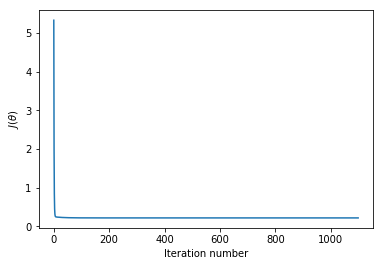

In [134]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number' )
plt.ylabel(r'$J(\theta)$')

### Selecting Learning Rates

We selected the learning rate `alpha = 0.2` and `num_iterations = 1100`. The previous plot should give you clues about how to improve the model.  What should you do? You can adjust either the learning rate `alpha` or the number of iterations `iters`. 

Let's look at the case where `iters = 20` and ask whether a different learning rate would be better in terms of minimizing $J(\theta)$ within the first 20 iterations. To look at a several learning rates at once, we can define a list

~~~python
alphas = [ ---, ---, ---, ---, ---]
iters = 20
~~~

to compute and plot different learning rates at once.

In the next cell, supply a range of learning rates, to plot and compare with respect to a fixed number of iterations. Note that in this plot we only look at the first 20 iterations.

Run the next cell, then answer the Question 2.

In [ ]:
alphas = [0, 0, 0, 0, 0]
iters = 20
for aa in alphas:
    theta_new, J_history = batchGradientDescent(X, y, theta, aa, iters)
    plt.plot(J_history, label='learning rate={0}'.format(aa) )

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations' )
plt.legend(loc='best', frameon=False)

---
## Question 2

What is the learning rate `alpha` that yields the lowest score $J(\theta)$ after exactly 20 iterations? Limit your search to values of `alpha` to two decimal places.  For example, if `alpha = 0.07` is your answer, you would finish function `ans_two()` by writing

~~~python
num = 0.07
~~~

Enter your answer below.

---

In [ ]:
def ans_two():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return num

In [ ]:
num = ans_two()
if type(num) == float and num == round(num,2):
    assert True
else:
    raise AssertionError("Check that your answer is a float and rounded to two decimal places")

---
## Question 3

Which are true? Mark all and only that apply.

Suppose that $J(\boldsymbol{\theta})$ is a continuously differentiable and convex function and $\theta$ is in $\mathbb{R}^2$.

  * A) Gradient Descent is guaranteed to converge to a local minima of <em>h</em> for all learning rates <em>α</em>.
  * B) Gradient Descent is guaranteed to converge to a local minima of <em>h</em> for some learning rates <em>α</em>
  * C) There is no learning rate <em>α</em> such that Gradient Descent is guaranteed to converge to a local minima of <em>h</em>
  *  D) The gradient of <em>h</em> is zero at the minimum.
  * E) The gradient of <em>J</em> points in the direction in $\mathbb{R}^2$ of the steepest increase in the value of <em>J</em>
---

In [ ]:
def ans_three():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
 
    # YOUR CODE HERE
    raise NotImplementedError()
    return ans

In [ ]:
# test cell for ans_three()
ans = ans_three()
possible_ans = ['A', 'B', 'C', 'D', 'E']
if type(ans) == list and any(ii in ans for ii in possible_ans):
    assert True
else:
    raise AssertionError("Inadmissible answer. Check that your answer to ans_one is the correct format.")

---
## Question 4

Instead of Gradient Descent, which yields an approximate solution to OLS regression, we can instead use the Normal Equation to calculate an analytical solution. 

Which of the following are true about the Normal Equation? Mark all and only that apply.

  * A) The number of features must be less than the number of training examples.
  * B) There is no learning rate hyperparameter to choose.
  * C) There is no need to iterate.
  * D) The speed of computing the normal equation slows exponentially as the number of features increases
  * E) The speed of computing the normal equation slows exponentially as the number of training examples increases

---

In [ ]:
def ans_four():
    """ Returns a list of your answers.  
    
    Parameters
    ----------
    :ans:  list
        The list of your answers. Elements of :ans: are strings.
    Returns
    -------
    :ans:
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return ans

# PART B - SciKit-Learn Linear Regression

Naturally, there are built-in libraries for regression models.  In fact, it just takes a few lines of code once we import `LinearRegression` from the `linear_model` methods in the `sklearn` (scikit-learn) library.

In [ ]:
# import sklearn linear regression 
from sklearn.linear_model import LinearRegression

Sklearn uses a common [API](https://en.wikipedia.org/wiki/Application_programming_interface) for building models. So, the sequence we follow to build a simple linear model resembles the sequence of steps for building a wide range of models.  It is good, therefore, to become aquainted with this tool.

Basically, there are two steps:

 - Instantiate a model
  
 - Fit the model

Followed by plotting and some rudimentary anlysis of the model. Later in the course we will add a third step, which involves making predictions and evaluating the accuracy of those predictions.

In [ ]:
# instantiate model
model = LinearRegression()
# fit the model
model.fit(X, y)

And that's it! 

How does this method relate to what you did in PART A?  To retrieve the parameters, we apply the following methods to `model`:

 - `.intercept_`
 - `.coef_`
 
Note that the trailing underscore `_` is simply used to avoid naming conflicts in sklearn. You can interpret each as giving you the intercept ($\theta_0$) and the remaining coefficients ($\theta_1, \theta_2, \ldots$) in your model, respectively. Here (hopefully!) some of what you learned in PART A can be useful to understand what the next lines of code are doing. 

Specifically, since sklearn linear regression can model multiple regression problems (i.e., problems with 2 or more features), the method `.coef_` returns an np.array rather than single number.  Hence, to retrieve the parameter value for $\theta_1$, we index by `[1]` into this array. 

In [ ]:
#print theta0 and theta1
print('theta_0:', model.intercept_)
print('theta_1:', model.coef_[1])  # model.coef_ returns an array

Compare the values you computed here to those you computed above.  

Next, we produce a plot. 

In [ ]:
plt.scatter(x, y)
plt.title('2017 World Happiness by Country')
plt.xlabel(r'Per Capita GPD')
plt.ylabel(r'Happiness Score')
plt.plot(x, model.predict(X),color='r')

The <b>coefficient of determination</b> or "r-squared", $r^2$, is a measure of how well a linear regression model fits our data.  Put more carefully, $r^2$ measures how much of the variation in the data is explained by the (best fit) model $h(x; \theta)$:

$$ r^2 := 1- \frac{SE \, \hat{y}}{SE \, \overline{y}} $$

where $SE \,\hat{y}$ is the squared error of the estimator $\hat{y} = h(x; \theta)$, otherwise known as the residual sum of squares (RSS), and $SE \, \overline{y}$ is the total sum of squares, defined by 

$$ SE \, \overline{y} = \sum_{i = 1}^{m}(y^{(i)} - \overline{y})$$ 

where $\overline{y}$ is the mean of the $m$ observed $y^{(i)}$'s. 

Although we are working with squared residuals, notice that we are asking a different question.  Until now, we have used squared error as a performance measure to find the best fitting linear model to our data.  The coefficient of determination is used to evaluate a model selection question, not a model fitting question.  The coefficient of determination measures how much variation is explained by your linear model, ranging between 0 (none) to 1 (all). 

The method `.score(X,y)` returns the $r^2$ of our model.  Note that we need `X`, which includes the column of intercept terms, rather than merely `x`.  

In [ ]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

Lastly, the [seaborn](https://seaborn.pydata.org/) statistical visualization library is an extension of matplotlib that includes several built-in features that allow you to create appealing and informative graphics.  For instance, we might like to visualize the <b>confidence interval</b> around our model.  The next two lines of code produce a (default) 95% confidence interval, that is, that interval $[L, U]$ is calculated by

$$L = \theta_1 - 1.96(SE\,\theta_1) \qquad U = \theta_1 - 1.96(SE\,\theta_1) $$

In [ ]:
import seaborn as sns
sns.set_style("ticks")
sns.regplot(x,y,line_kws = {"color": 'r'})

# PART C - Your Turn

Let's review. In Part A you focused on the mechanics of <b>gradient descent</b>, how the mathematical components of <b>ordinary least squares regression</b> (OLS) regression can be represented and computed by NumPy element-wise array operations, and how those computational components fit together into an implementation of Batch Gradient Descent.  You then ran your implementation of gradient descent to find approximate solutions for the parameter of coefficients, $\boldsymbol{\theta}$, and recorded a step-wise history of values of the cost function, showing the progress of the algorithm in finding values of $\boldsymbol{\theta}$ taht minimize $J(\boldsymbol{\theta})$.  In Part B you used the SciKit-Learn library to confirm the parameter values, were introduced to the "logic" of the sklearn API (which you will see more of, later in the course), were introduced to a method -- $r^2$ to evaluate the model, and a brief introduction to the statistical plotting library <b>seaborn</b>

In this section, you will do some of the data preparation work that was done for you to fit a regression model on <b>life expectancy</b>.  The data set `ps1_data2.csv` contains the two columns of data in `ps1_data1.csv` plus a third  column recording the average life expectancy, in years, of each country.

<div class="alert alert-info"> <b>Note</b>:
The average life expectancy data is scaled to values between 0 and 1. For example, a country whose average lifespan is 77.45 years will appear as 0.7745.
</div>

Your first task is to run the next cell to load `ps1_data2.csv`.  Then, on your own, you will need to prepare the data set to perform a <b>univariate linear regression model</b> to the explain the target variable <i>happiness</i> from the feature </i> average lifespan.  That is, $x$ will be the life expectancy feature, and $y$ will be the happiness score (as before). 

In [ ]:
data2 = np.loadtxt('ps1_data2.csv', delimiter=',')

Once `data2` is in the right format to use the code you have written in Part A and the libraries introduced to you in Part B, use those tools (and those tools only) to answer each part of Question 5. 

In [ ]:
# A free code cell

---
## Question 5

Run Gradient descent and sklearn linear regression on `data2`.  Be sure to pick new variables names to ensure that all variables correspond to data set `ps_data2` and not to `ps_data1`. 

There are four quantities that you will need to report about your OLS univariate regression model explaining happiness scores as a linear function of average life expectancy, which we will refer to as "model 2": 

 - a) The value of the intercept parameter $\theta_0$ of the fitted univariate regression model 2.
 - b) The value of the coefficient parameter $\theta_1$ of the fitted univariate regression model 2.
 - c) The value of the cost function, $J([\theta_0, \theta_1])$, on the fitted parameters for model 2.. Note that this is the last value stored in the J_history cost function.
 - d) The coefficient of determination score of model 2.

The test condition for a, b, c, rounds the correct answers to 5 decimal places, using the python function `round(--your answer --, 5)`; the test condition for answer 3 rounds to 3 decimal places. 

In the following cell, enter the values for for those variables.  Here is the key:

~~~python
def ans_5():
    a =     # a: theta_0 from your fitted model, rounded to 5 decimal places
    b =     # b: theta_1 from your fitted model, rounded to 5 decimal places
    c =     # c: the last value of the array J_history, rounded to 5 decimal places
    d =     # d: r-squared value, rounded to 3 decimal places
~~~

<div class="alert alert-info"> <b>Hint</b>:
If you use tools from Part A and Part B, it is important that they return the same answers (up to 5 decimal places) to those parts of Question 5 that they both can answer. Now the hint: You may want to aim for slightly higher precision for some quantities to ensure the test conditions for all four quantities are satisfied. 
</div>
---

In [ ]:
def ans_five():
    """ Returns four numerical values of your linear model.  
    
    Parameters
    ----------
    :a:  float
        The value of theta_0 from your fitted model, rounded to 5 decimal places.
    :b:  float
        The value of theta_1 from your fitted model, rounded to 5 decimal places
    :c:  float
        The last value of the array J_history, rounded to 5 decimal places
    :d:  float
        The calculated r-squared of your fitted model, rounded to 3 decimal places
    
    Returns
    -------
    :a:
    :b:
    :c:
    :d:
    """
 
    # YOUR CODE HERE
    raise NotImplementedError()
    return a, b, c, d  # do not edit
   

In [ ]:
# Test for Collaborator policy before submission
%run -i 'collaboration_test.py'

Before turning this notebook in, you should do the following steps:
  
  1. __Restart Kernel__ (Kernel ⟶ Restart and Clear Output)
  2. __Run all Cells__ (Cell ⟶ Run All)
  3. __Validate__: Press the 'Validate' button
  4. __Save File__ (File ⟶ Save and Checkpoint)
  5. __Close and Shutdown Kernel__ (File ⟶ Close and Halt)